Ultimate Technologies Inc. Take-Home Challenge


The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
#Importing the necessary packages 
import pandas as pd
import matplotlib.pyplot as plt





In [2]:
#Creating the dataframe to contain the logins file and previewing what the dataframe contains
logins = pd.read_json('logins.json')
print(f"Login first few lines: \n {logins.head()}")
print(f" \n Login last few lines: \n {logins.tail()}")

Login first few lines: 
            login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
 
 Login last few lines: 
                login_time
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23


In [3]:
#Checking to see if there are any missing values in the logins dataframe 
if logins.isna().any().any():
    print("There are missing values in the Logins data")
else:
    print("There are no missing values in the Logins data")

There are no missing values in the Logins data


In [4]:
#Converting the login timestampes in the dataframe
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins.set_index('login_time', inplace=True)


In [6]:
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
logins_counts = logins.resample('15T').count()

In [15]:
logins_counts.head()

""
login_time
1970-01-01 20:00:00
1970-01-01 20:15:00
1970-01-01 20:30:00
1970-01-01 20:45:00
1970-01-01 21:00:00


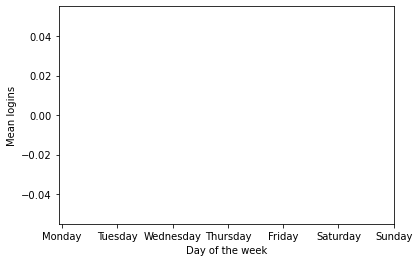

In [19]:
daily_logins = logins_counts.groupby(logins_counts.index.dayofweek).mean()
plt.plot(daily_logins.index, daily_logins.values)
plt.xlabel("Day of the week")
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel("Mean logins")
plt.show()